# Forward Rendering

This notebook demonstrates how to solve the radiative transfer using SHDOM and render a simulated image.

The source Fortran code was created by Frank Evans and it is part of the SHDOM package: http://nit.colorado.edu/shdom.html

The python wrapper was created by Aviad Levis and Amit Aides, Technion inst. of Technology 2019: https://github.com/aviadlevis/pyshdom

In [1]:
"""
Imports necessary for this notebook
"""
import os 
import matplotlib.pyplot as plt
import numpy as np

import shdom

In [2]:
""" 
Load a previously saved mie table to a mie object.
"""

mie = shdom.Mie()
mie.read_table(file_path='../mie_tables/Water_672nm.scat')

Reading mie table from file: ../mie_tables/Water_672nm.scat
Done.


In [3]:
""" 
Load a Large-Eddy-Simulated cloud from a csv file.
Using the mie tables (loaded in the previous cell) the liquid water content and 
effective radii are transformed into the extinction and phase function on a 3D grid.
The lwc/phase are used to initilize a Medium object.
"""
csv_path = '../synthetic_cloud_fields/jpl_les/32x36x25.txt'

lwc, reff = shdom.load_les_from_csv(csv_path)
extinction, phase = mie.interpolate_scattering_field(lwc, reff)
atmosphere = shdom.Medium(extinction, phase)

In [5]:
"""
Initilize an RteSolver object and attach the Medium to it. 
This will initialize all of shdom internal structures and grids.

SceneParameters() contains parameters such as surface albedo and solar radiance
NumericalParameters() contains parameters such as number of angular bins and split cell ratio.
All parameters have default values.
"""
scene_params = shdom.SceneParameters()
numerical_params = shdom.NumericalParameters()

rte_solver = shdom.RteSolver(scene_params, numerical_params)
rte_solver.init_medium(atmosphere)

/home/levisav/pyshdom/shdom/rte_solver.py:165: UserWarning: AttributeError("'RteSolver' object has no attribute '_propfile'",)
  warnings.warn(repr(e))


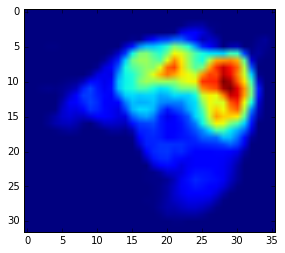

In [110]:
%matplotlib inline
plt.imshow(np.sum(lwc_3d, axis=2))

In [ ]:
# temperatures (jpl_les)
# 292.220 292.040 291.860 291.680 291.500 291.320 291.140 290.960 290.780 290.600 290.420 290.240 290.060 289.880 289.700 289.920 290.140 290.360 290.580 290.800 291.020 291.240 291.460 291.680 291.900